[View in Colaboratory](https://colab.research.google.com/github/Masum06/Deep-learning-with-PyTorch-video/blob/master/PyTorch_Packt.ipynb)

### Installation

Fast.ai has all dependencies installed and more. So we install this instead of PyTorch

In [1]:
!pip install fastai

    100% |████████████████████████████████| 122kB 4.2MB/s 
    100% |████████████████████████████████| 61kB 6.4MB/s 
    100% |████████████████████████████████| 2.2MB 7.9MB/s 
    100% |████████████████████████████████| 3.4MB 11.3MB/s 
    100% |████████████████████████████████| 51kB 17.7MB/s 
    100% |████████████████████████████████| 112kB 12.8MB/s 
    100% |████████████████████████████████| 1.5MB 7.7MB/s 


    100% |████████████████████████████████| 496.4MB 29kB/s 
    100% |████████████████████████████████| 184kB 19.9MB/s 
    100% |████████████████████████████████| 51kB 11.2MB/s 


    100% |████████████████████████████████| 71kB 14.5MB/s 
    100% |████████████████████████████████| 112kB 18.3MB/s 
    100% |████████████████████████████████| 92kB 17.9MB/s 
    100% |████████████████████████████████| 13.7MB 1.7MB/s 
    100% |████████████████████████████████| 81kB 14.5MB/s 
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \

 | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built torchtext bcolz feather-format
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [2]:
!git clone https://github.com/PacktPublishing/Deep-learning-with-PyTorch-video.git

Cloning into 'Deep-learning-with-PyTorch-video'...
remote: Counting objects: 89, done.
remote: Total 89 (delta 0), reused 0 (delta 0), pack-reused 89
Unpacking objects: 100% (89/89), done.


In [3]:
cd Deep-learning-with-PyTorch-video/

/content/Deep-learning-with-PyTorch-video


## Simple NN

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

# Custom DataSet
from data import iris

In [6]:
!head data/iris.data.txt

sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


### Create the Fully Connected Feed Forward Neural Network

**Create the module**

In [0]:
class IrisNet(nn.Module): # this is how to create a neural network in PyTorch, inherit nn.Module class
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes): 
      # Constructor function, passed with the object. We can initialize it if we want
        
        super(IrisNet, self).__init__() # assigning the same to parent class
        # names are arbitrary
        # just defining functions here. That will be used later.
        # Here we are creating the computational graph
        self.fc1 = nn.Linear(input_size, hidden1_size) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

**Print the module**

In [8]:
model = IrisNet(4, 100, 50, 3)
print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


### Create DataLoader

In [0]:
batch_size = 60
iris_data_file = 'data/iris.data.txt'

Batch size is how many data the network will handle at a time. It helps with the limitation of RAM. If the dataset is too high we cannot load the whole into RAM and GPU memory. So, we split our training set into multiple batches. batch_size * number_of_batches = 1 epoch. That means, if there is 120 data, we cannot load all of them together, we load 60 at a time twice. That means in 2 batch.

In [10]:
# Get the datasets
train_ds, test_ds = iris.get_datasets(iris_data_file)

# How many instances have we got?
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))

# Create the dataloaders - for training and validation/testing
# We will be using the term validation and testing data interchangably
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True) # PyTorch library, can't argue with that
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

# instances in training set:  120
# instances in testing/validation set:  30


### Instantiate the network, the loss function and the optimizer

We could look into what other kind of Optimizers are available here

Notice, we never defined the Backpropagation function. That is taken care of by the library itself.

As the architecture is known, there is no harm if the library automatically takes care of the Backprop.

In [0]:
# Our model
net = IrisNet(4, 100, 50, 3) # 4 row in dataset, sepal and petal length and width

# Out loss function
criterion = nn.CrossEntropyLoss() # where did we use it??
                                  # in training

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

### Train it

This is the hardest part to understand. Lot of stuff going on, not everything makes sense. We can watch the video again if it explained WTF just happened, so that in future we can make our own network without seeing anything from the scratch.

In [0]:
num_epochs  = 500

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0 # How many correct in this epoch. To calculate accuracy
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        # Convert torch tensor to Variable
        # WTF is a Variable here???
        items = Variable(items)
        classes = Variable(classes)
        
                              # Who the Fuck defined 'net'???
        net.train()           # Put the network into training mode
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data[0]))

    net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
    train_loss.append(loss.data[0])

    # What was our train accuracy?
    train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])
    test_classes = torch.LongTensor(test_ds.data.values[:, 4])

    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    test_loss.append(loss.data[0])
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))

**Plot loss function**

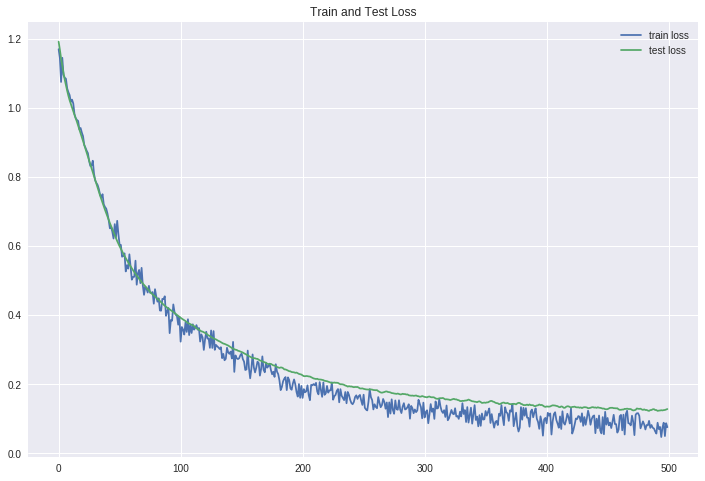

In [13]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title("Train and Test Loss")
plt.legend()
plt.show()

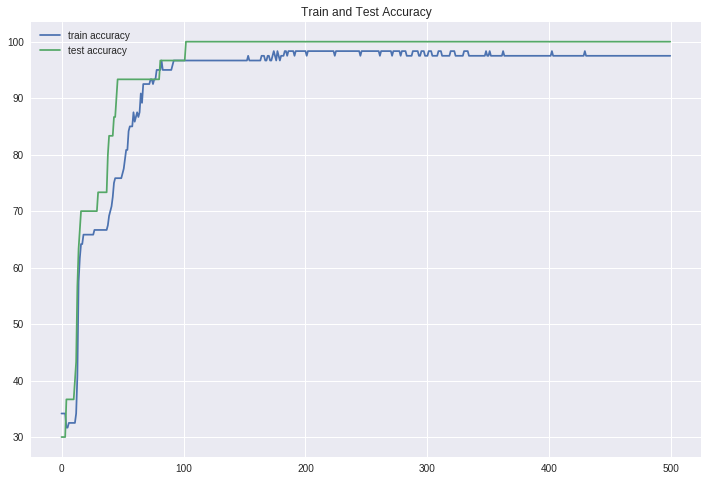

In [14]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='train accuracy')
plt.plot(test_accuracy, label='test accuracy')
plt.title("Train and Test Accuracy")
plt.legend()
plt.show()

### Savign the model to disk, and loading it back

In [0]:
torch.save(net.state_dict(), "./2.model.pth")

In [0]:
net2 = IrisNet(4, 100, 50, 3)
net2.load_state_dict(torch.load("./2.model.pth"))

In [0]:
output = net2(Variable(torch.FloatTensor([[5.1, 3.5, 1.4, 0.2]])))

In [19]:
_,  predicted_class  = torch.max(output.data, 1)
print('Predicted class: ', predicted_class.numpy()[0])
print('Expected class: ', 0 )

Predicted class:  0
Expected class:  0
